# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

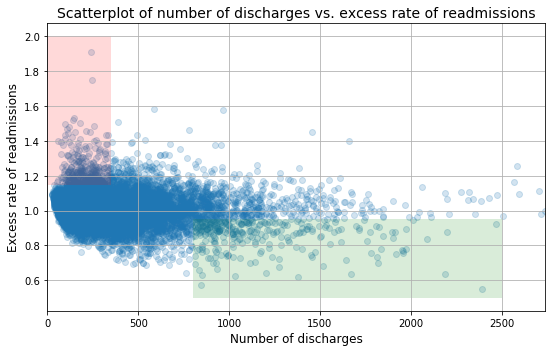

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A. Do you agree with the above analysis and recommendations? Why or why not?

Overall, no.

The downward trend may exist, but it is certainly not dramatic (at least it does not appear that way from the chart) and there is no discernible pattern in the rectangle between (0, 1000) number of discharges and (0.8, 1.2) ERR.

Also, the statistics given may be accurate, but they were not calculated in this notebook. With that said, it is impossible to confirm the statement that there is a significant correlation between hospital capacity and ERR without further analysis. The reason given for this trend (a lack of resources) is not supported by the data, at least not as it has been presented here.

Some other factor may be more directly associated with ERR, or hospital capacity may adversely affect other indicators or patient care that are not captured in this analysis, in which case recommending that hospitals consolidate into larger organizations may have a harmful effect on quality of patient care.

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

In [5]:
import seaborn as sns
import scipy.stats as stats

sns.set(style='ticks')

In [6]:
# data cleaning
columns = ['Provider Number',
           'State',
           'Measure Name',
           'Number of Discharges',
           'Excess Readmission Ratio']

df = hospital_read_df[columns]

columns_rename = ['hospital_id', 'state', 'measure', 'discharges', 'err']

df.columns = columns_rename

In [7]:
# drop nulls
df = df[df['discharges'] != 'Not Available']
df.dropna(axis=0, how='any', subset=['err'], inplace=True)

In [8]:
df['discharges'] = pd.to_numeric(df['discharges'])

In [9]:
HF = df[df['measure'] == 'READM-30-HF-HRRP']
PN = df[df['measure'] == 'READM-30-PN-HRRP']
COPD = df[df['measure'] == 'READM-30-COPD-HRRP']
AMI = df[df['measure'] == 'READM-30-AMI-HRRP']
HIP = df[df['measure'] == 'READM-30-HIP-KNEE-HRRP']

In [10]:
df_large = df[df['discharges'] > 100]
df_small = df[df['discharges'] <= 100]

In [11]:
# pearson r
overall_r = stats.pearsonr(df['discharges'], df['err'])

HF_r = stats.pearsonr(HF['discharges'], HF['err'])
PN_r = stats.pearsonr(PN['discharges'], PN['err'])
COPD_r = stats.pearsonr(COPD['discharges'], COPD['err'])
AMI_r = stats.pearsonr(AMI['discharges'], AMI['err'])
HIP_r = stats.pearsonr(HIP['discharges'], HIP['err'])

print('overall_r:', round(overall_r[0], 3))
print('HF_r:', round(HF_r[0], 3))
print('PN_r:', round(PN_r[0], 3))
print('COPD_r:', round(COPD_r[0], 3))
print('AMI_r:', round(AMI_r[0], 3))
print('HIP_r:', round(HIP_r[0], 3))

overall_r: -0.097
HF_r: -0.033
PN_r: 0.025
COPD_r: 0.107
AMI_r: -0.145
HIP_r: -0.35


### B1. Setup an appropriate hypothesis test

- Null Hypothesis: No difference between the distribution of ERR for large hospitals (number discharges > 100) and small hospitals (n <= 100).
- Alternate Hypothesis: There *is* a difference in the distributions.

### B2. Compute and report the observed significance value (or p-value)

In [12]:
# two-sample t-test
t_test = stats.ttest_ind(df_small['err'], df_large['err'])

print('p-value:', round(t_test.pvalue, 3))

p-value: 0.0


### B3. Report statistical significance for $\alpha$ = .01

A p-value of 0 (when rounded to 3 decimal places) is still less than .01.

### B4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Statistical significane refers to a measurable, repeatably-identifiable difference in two values. However, in practice this difference can be so small as to be practically meaningless. In this case, while the difference is statistically significant, the overall trend is so small that the difference in distribution between high and low volume hospitals is not enough to justify the recommendation that hospitals consolidate to form larger networks.

### B5. Look at the scatterplot above.

#### B5a. What are the advantages and disadvantages of using this plot to convey information?

All the data is pushed together in one big clump and it is hard to make out any trends. However, the shaded boxes do provide a helpful guide to focus in on the important parts of the graph.

#### B5b. Construct another plot that conveys the same information in a more direct manner.

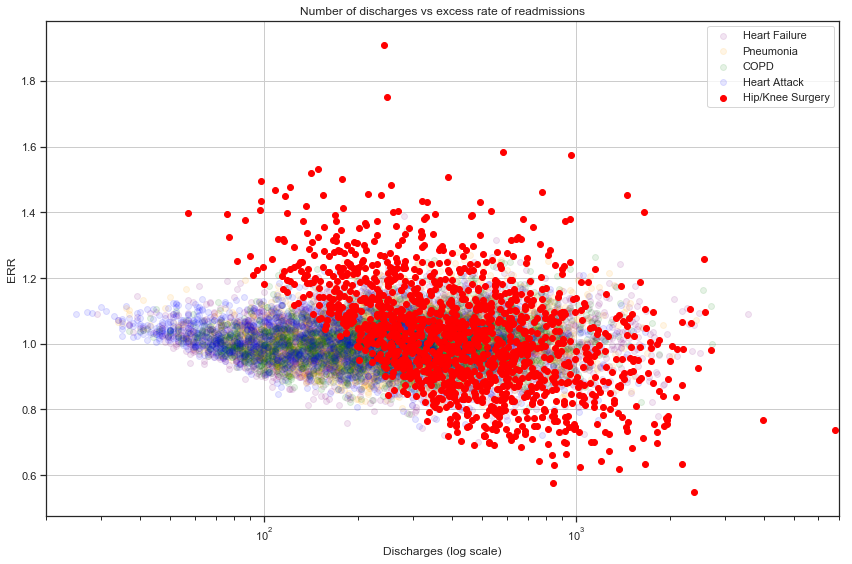

In [13]:
x_HF = [a for a in HF['discharges']]
y_HF = list(HF['err'])

x_PN = [a for a in PN['discharges']]
y_PN = list(PN['err'])

x_COPD = [a for a in COPD['discharges']]
y_COPD = list(COPD['err'])

x_AMI = [a for a in AMI['discharges']]
y_AMI = list(AMI['err'])

x_HIP = [a for a in HIP['discharges']]
y_HIP = list(HIP['err'])

fig, ax = plt.subplots(figsize=(12,8))
_ = ax.scatter(x_HF, y_HF, c='purple', alpha=0.1)
_ = ax.scatter(x_PN, y_PN, c='orange', alpha=0.1)
_ = ax.scatter(x_COPD, y_COPD, c='green', alpha=0.1)
_ = ax.scatter(x_AMI, y_AMI, c='blue', alpha=0.1)
_ = ax.scatter(x_HIP, y_HIP, c='red', alpha=1)

_ = ax.set_xlim([20, 7000])
_ = ax.set_xscale('log')
_ = ax.set_xlabel('Discharges (log scale)')
_ = ax.set_ylabel('ERR')
_ = ax.set_title('Number of discharges vs excess rate of readmissions')
_ = ax.legend(['Heart Failure', 'Pneumonia', 'COPD', 'Heart Attack', 'Hip/Knee Surgery'])

ax.grid(True)
fig.tight_layout()